In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

In [251]:
def threeD_yield_curve(df: pd.DataFrame, flip_dates: bool = False, flip_maturity = False, flip_axis = False, label_spacing = 5, elev=10, azim=60):    
    maturities = ['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']
    
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')
    dates = df['Date'].tolist()
    dates.reverse() if flip_dates else None

    yields_data: List[List[int]] = df.values.tolist()
    for list in yields_data:
        del list[0]
            
    date_indices = np.arange(len(dates)) if not flip_dates else np.flip(np.arange(len(dates)))
    maturity_indices = np.flip(np.arange(len(maturities))) if not flip_maturity else np.arange(len(maturities))

    X, Y = np.meshgrid(maturity_indices, date_indices) if not flip_axis else np.meshgrid(date_indices, maturity_indices)
    Z = np.array(yields_data) if not flip_axis else np.array(yields_data).T

    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

    if not flip_axis:
        ax.set_xticks(maturity_indices)
        ax.set_xticklabels(maturities, rotation=45, ha='right')
        ax.set_yticks(date_indices)
    else:
        ax.set_yticks(maturity_indices)
        ax.set_xticklabels(maturities, rotation=45, ha='right')
        ax.set_xticks(date_indices)
    
    # no need to plot all labels
    new_labels = []
    for i, x in enumerate(dates):
        if (i % label_spacing == 0):
            new_labels.append(x)
        else:
            new_labels.append('')
    
    new_labels.reverse() if flip_dates else None
    ax.set_yticklabels(new_labels) if not flip_axis else ax.set_xticklabels(new_labels) 
    
    if not flip_axis:
        ax.set_xlabel('Maturity')
        ax.set_ylabel('Date')
    else:
        ax.set_ylabel('Maturity')
        ax.set_xlabel('Date')        
    ax.set_zlabel('Yield (%)')

    ax.set_title('3D Yield Curve')
    ax.view_init(elev=elev, azim=azim)
    
    plt.show()

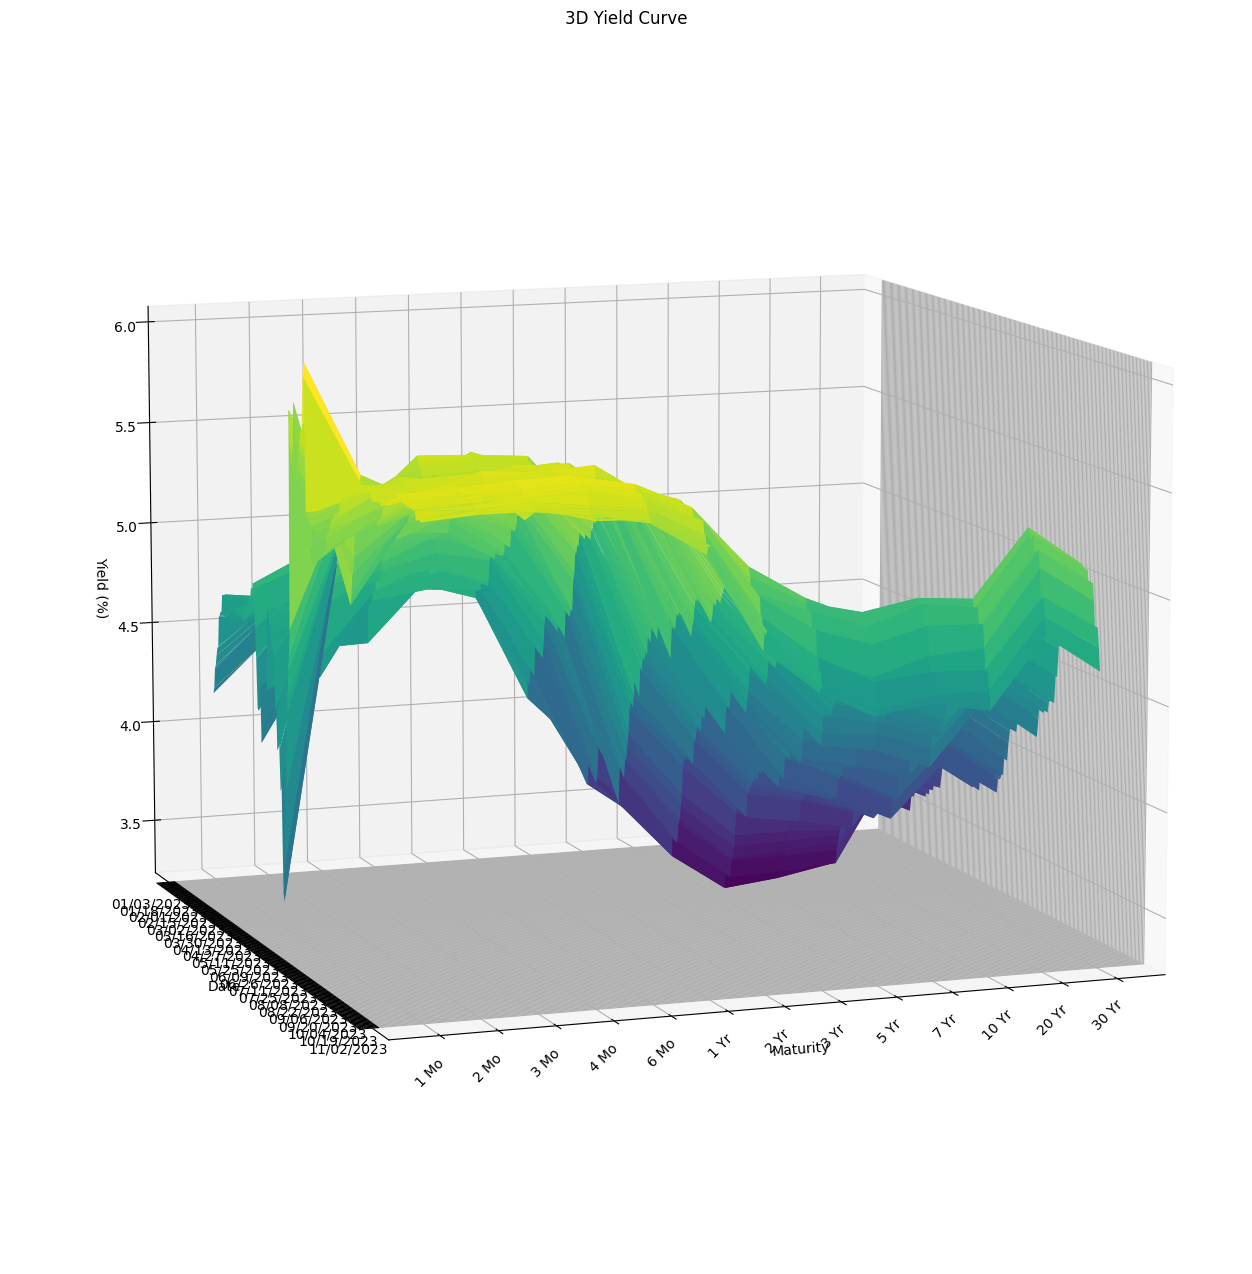

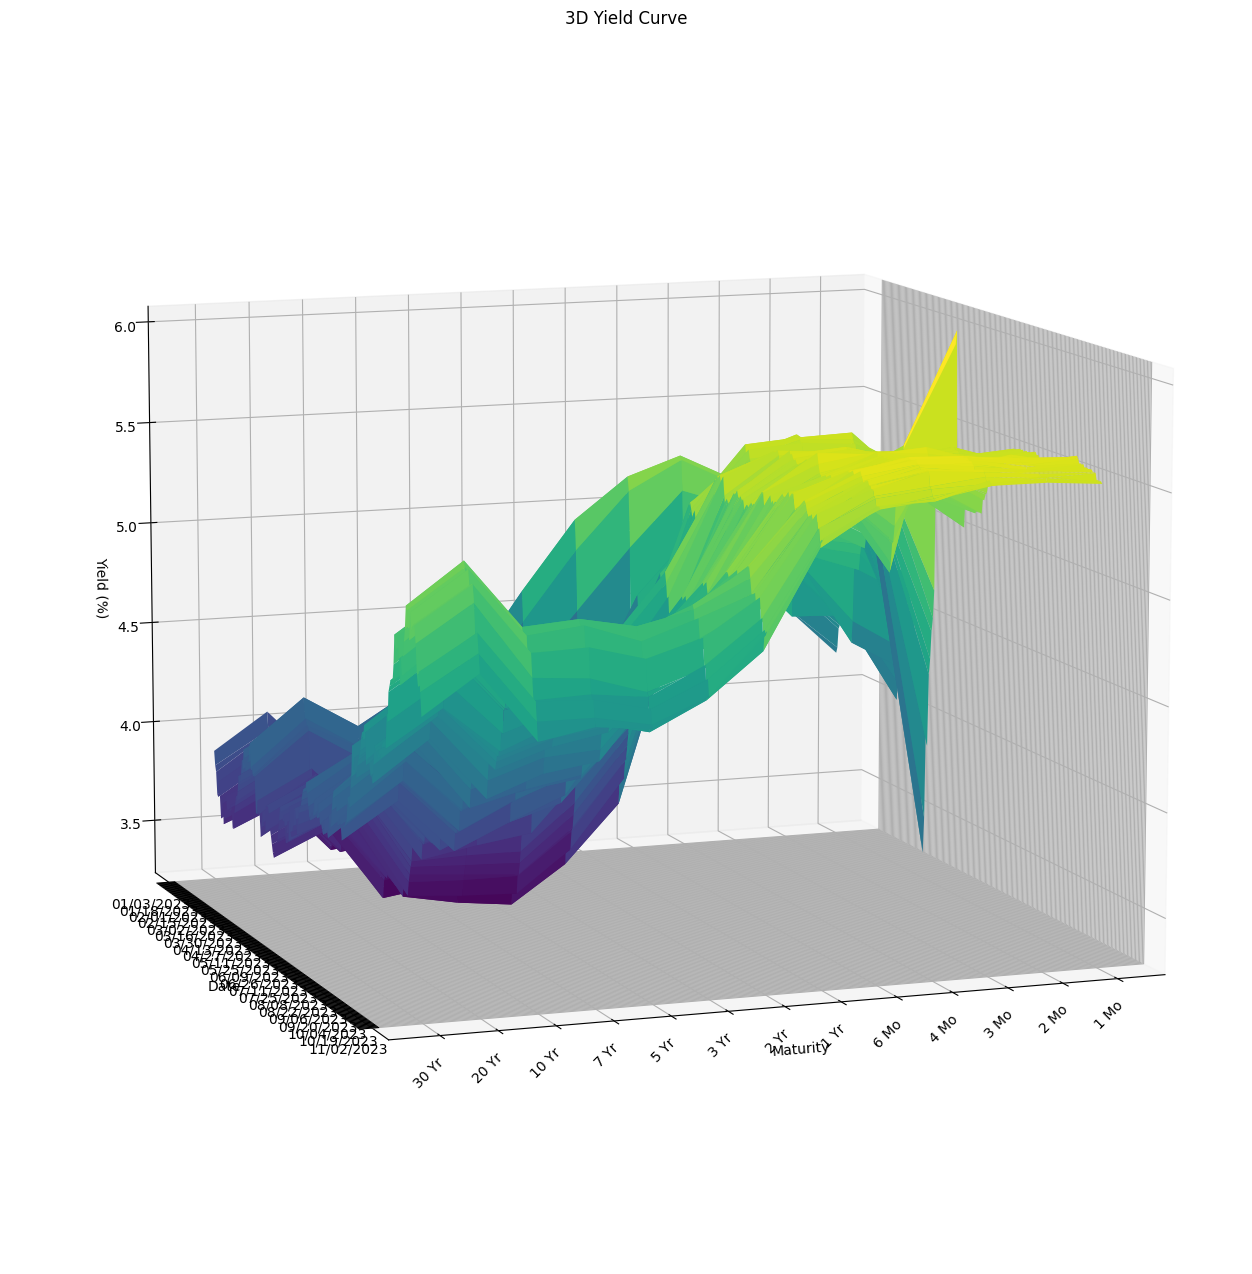

C:\Users\chris\AppData\Local\Temp\ipykernel_14872\997475506.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(maturities, rotation=45, ha='right')


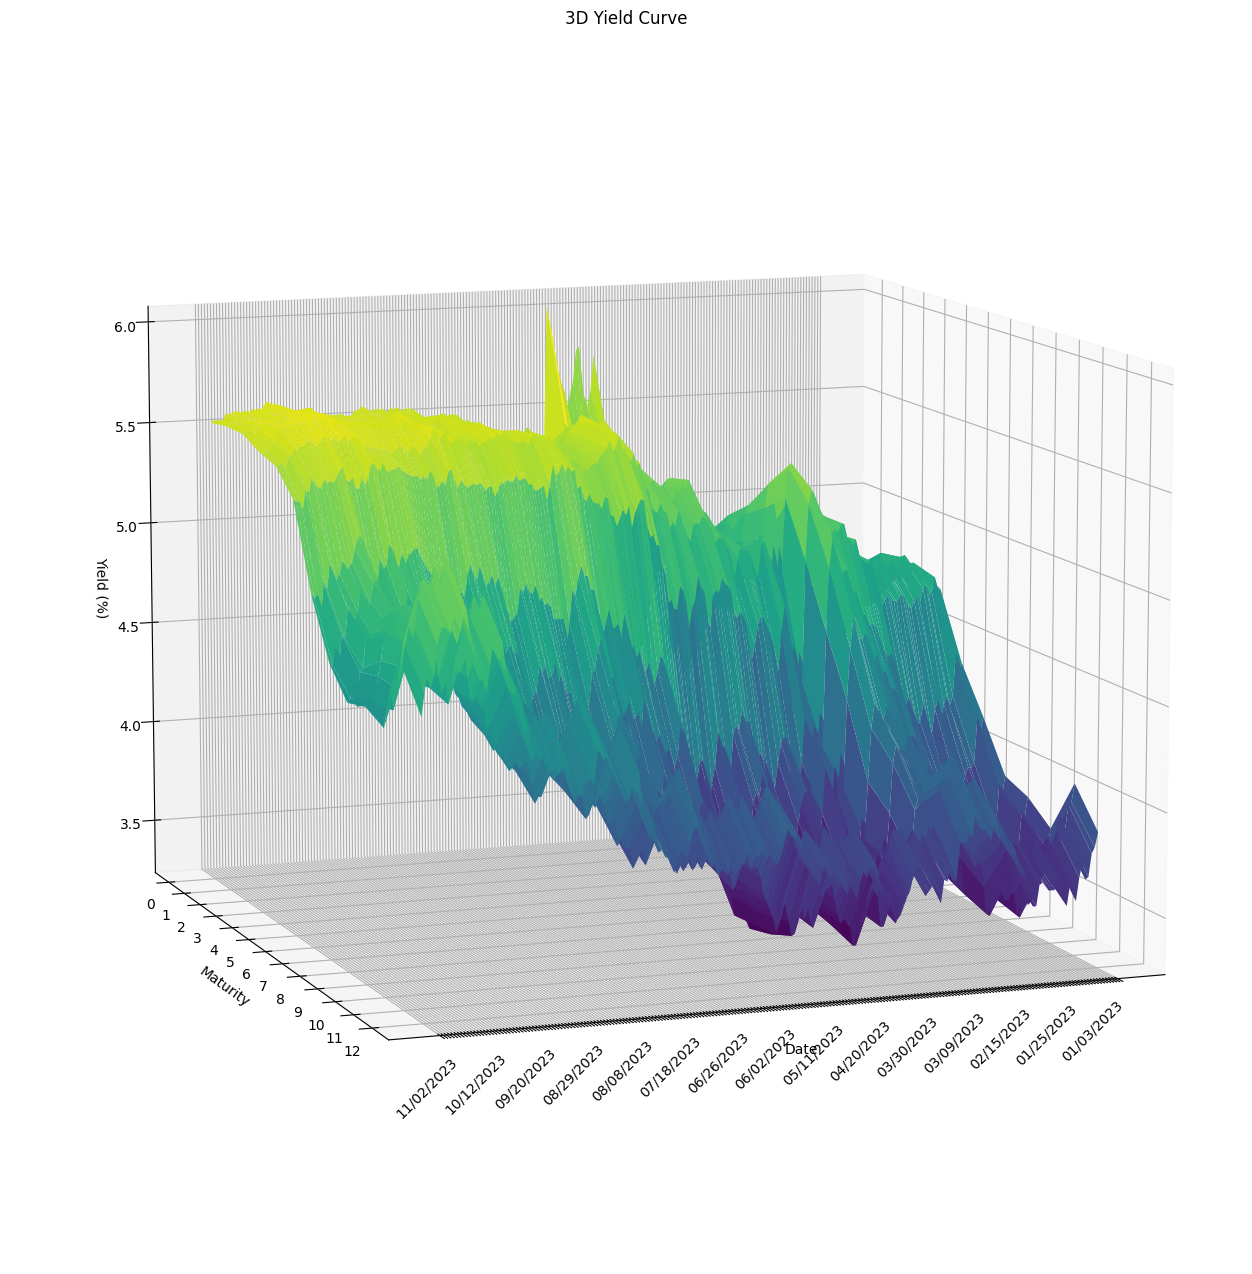

In [252]:
df_1 = pd.read_excel(r'C:\Users\chris\trade\curr_pos\utils\treasuries\2023_daily_treasury_rates.xlsx')

threeD_yield_curve(df_1, flip_dates=True, flip_maturity=False, label_spacing=10, elev=10, azim=70)
threeD_yield_curve(df_1, flip_dates=True, flip_maturity=True, label_spacing=10, elev=10, azim=70)
threeD_yield_curve(df_1, flip_dates=True, flip_maturity=True, flip_axis=True, label_spacing=15, elev=10, azim=70)

In [195]:
def current_yield_curve(df: pd.DataFrame, date: str, reverse_mats: bool = False):
    maturities = ['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']
    # if want to use actual scales 
    # months = [1, 2, 3, 4, 6, 12, 24, 36, 60, 84, 120, 240, 360]
    months = [x + 1 for x in range(0, len(maturities))]

    plt.figure(figsize=(10, 6))
    yields = df.loc[df['Date'] == date]
    yields = yields.values.tolist()[0]
    del yields[0]
    
    yields.reverse() if reverse_mats else None
    maturities.reverse() if reverse_mats else None
    
    plt.plot(months, yields, marker='o')
    plt.title(f'Yield Curve {date}')
    plt.xlabel('Maturity (Months)')
    plt.ylabel('Yield (%)')
    plt.grid(True)

    plt.xticks(months, maturities)  
    plt.show()

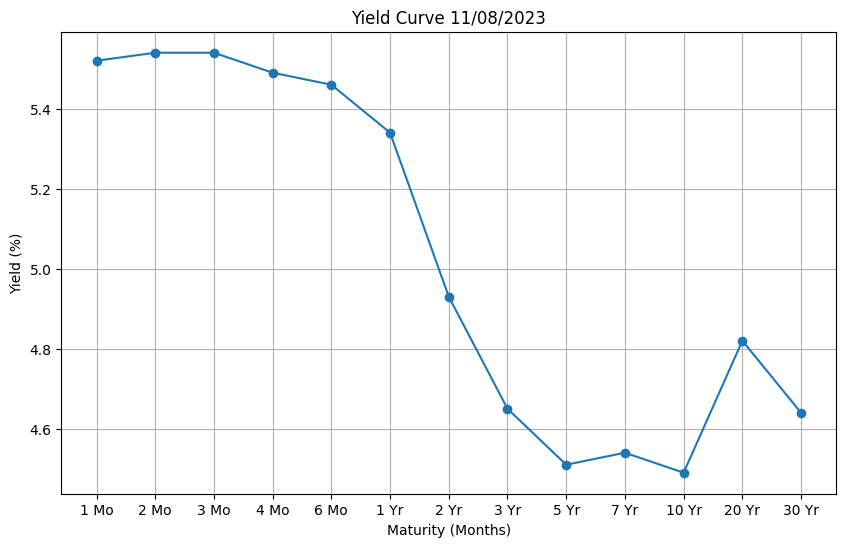

In [253]:
date = "11/08/2023" 
current_yield_curve(df_1, date)